In [ ]:
from google.colab import files
uploaded = files.upload()


Saving dataset.zip to dataset.zip


In [ ]:
import zipfile
import os

with zipfile.ZipFile("dataset.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

print("✅ Dataset extracted!")


✅ Dataset extracted!


In [ ]:
organic_path = 'dataset/organic'
recyclable_path = 'dataset/recyclable'

print("Organic path exists:", os.path.exists(organic_path))
print("Recyclable path exists:", os.path.exists(recyclable_path))

organic_count = len(os.listdir(organic_path))
recyclable_count = len(os.listdir(recyclable_path))

print(f"Organic images: {organic_count}")
print(f"Recyclable images: {recyclable_count}")


Organic path exists: True
Recyclable path exists: True
Organic images: 2
Recyclable images: 3


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_HEIGHT, IMG_WIDTH = 128, 128
BATCH_SIZE = 32
base_dir = 'dataset'

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)


Found 1913 images belonging to 2 classes.
Found 477 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers, models

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,705,921 (14.14 MB)

 Trainable params: 3,705,921 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 719ms/step - accuracy: 0.5639 - loss: 1.3215

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 48s 776ms/step - accuracy: 0.5646 - loss: 1.3138 - val_accuracy: 0.7778 - val_loss: 0.5617
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 49s 822ms/step - accuracy: 0.7019 - loss: 0.5701 - val_accuracy: 0.6876 - val_loss: 0.6159
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 47s 784ms/step - accuracy: 0.7353 - loss: 0.5195 - val_accuracy: 0.6331 - val_loss: 0.5850
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 46s 766ms/step - accuracy: 0.7645 - loss: 0.4812 - val_accuracy: 0.7589 - val_loss: 0.5247
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 47s 787ms/step - accuracy: 0.7763 - loss: 0.4677 - val_accuracy: 0.7652 - val_loss: 0.5557
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 48s 805ms/step - accuracy: 0.8162 - loss: 0.3910 - val_accuracy: 0.6730 - val_loss: 0.5705
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 47s 777ms/step - accuracy: 0.8636 - loss: 0.3224 - val_accuracy: 0.7547 - val_loss: 0.6140
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 48s 797ms/step - accuracy: 0.8679 - loss: 0.2928 - val_accuracy: 0.691

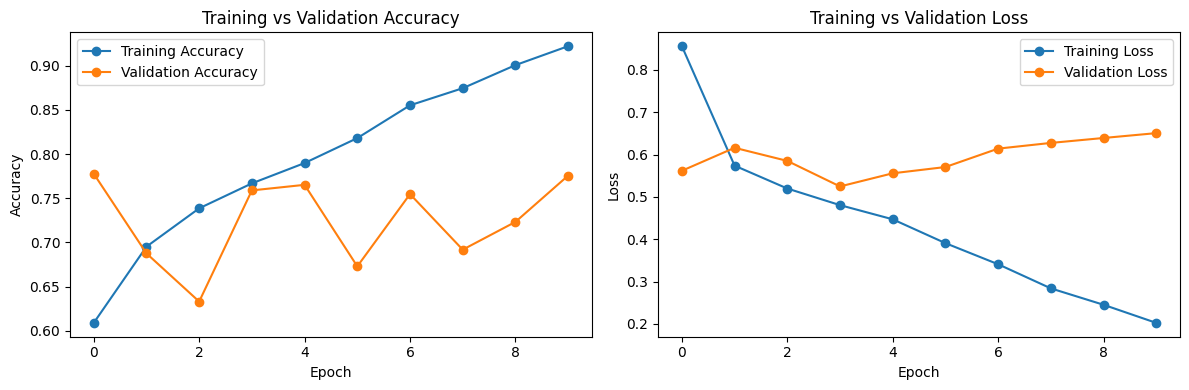

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
model.save("garbage_classifier_model.h5")
print("✅ Model saved as garbage_classifier_model.h5")


✅ Model saved as garbage_classifier_model.h5


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving plastic bottle.jpeg to plastic bottle.jpeg


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Automatically get the uploaded image name
img_path = list(uploaded.keys())[0]

# Load and preprocess the image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict using the trained model
prediction = model.predict(img_array)

# Interpret the result
label = "Recyclable" if prediction[0][0] > 0.5 else "Organic"
print(f"🧠 Prediction: {label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
🧠 Prediction: Recyclable


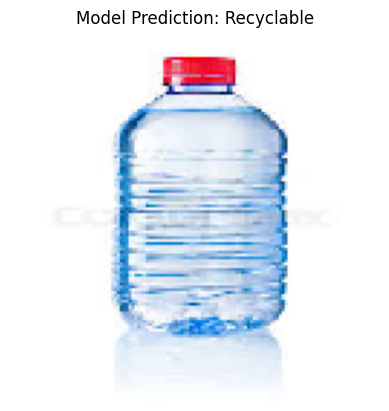

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.axis('off')
plt.title(f"Model Prediction: {label}")
plt.show()
